Requirements

- Analyze hours-per-week Target Distribution **1p**
    - Provide visualizations like histograms or density plots for hours-per-week to assess its distribution, outliers, and skewness.

- Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation. **1p**

- Check for missing values and report the number and percentage of missing data for each column. **1p**

- Identify outliers in at least one numerical column using boxplots. **1p**

- Write a summary report of your findings from the EDA, highlighting key patterns or trends, unexpected insights or anomalies, and areas requiring further investigation. **1p**


- Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality. - Optional

- Generate bar plots for at least three categorical columns and discuss the frequency distributions. - Optional

- Create a correlation matrix for target hours-per-week and the rest of numerical variables and discuss the strongest and weakest correlations with the target. - Optional

- Explore relationships between at least one numerical variable and hours-per-week target using scatter plots and identify any visible trends. Choose the variable that is/are most correlated with hours-per-week. - Optional

- Analyze the relationship between hours-per-week and all categorical variable using boxplots or violin plots. - Optional

- At the end, do the same analysis for the preprocessed dataset (just change the input data in the EDA), and write a report. - Optional

- Others? - Optional


Deliverable:

- Notebook code with no errors.
- Include all visuals from the requirements in the notebook: graphs, plots, histograms, heatmap etc
- Be sure to discuss the findings and add a summary report

Sunt importate bibliotecile necesare pentru analiza exploratorie a datelor (EDA).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Load data

In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

columns = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week",
    "native-country", "income"
]

data = pd.read_csv(
    data_url,
    header=None,
    names=columns,
    na_values="?",
    skipinitialspace=True
)

data.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1. Analyze hours-per-week target distribution

Verific cum sunt distribuite orele lucrate: sunt multe valori mici, exista outlieri?

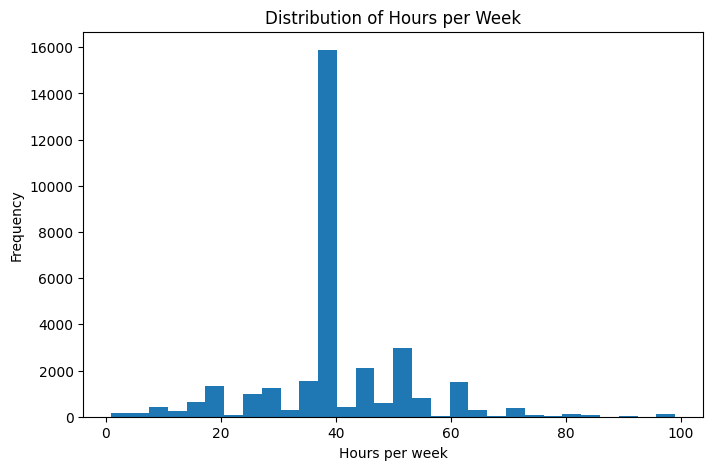

In [3]:
plt.figure(figsize=(8,5))
plt.hist(data["hours-per-week"], bins=30)
plt.xlabel("Hours per week")
plt.ylabel("Frequency")
plt.title("Distribution of Hours per Week")
plt.show()


Distribuția variabilei hours-per-week arată că majoritatea indivizilor lucrează în jur de 40 de ore pe săptămână, ceea ce sugerează un program standard de lucru. Se observă existența unor valori mai mici, dar și valori foarte mari, care pot fi considerate outlieri. Distribuția este ușor asimetrică spre dreapta.

2. Summary of the dataset using descriptive statistics, such as mean, median, and standard deviation

In [4]:
data.describe()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Statisticile descriptive arată că setul de date conține 32.561 de observații.

Pentru variabila țintă hours-per-week, media este de aproximativ 40.4 ore, iar mediana este 40 ore, ceea ce confirmă faptul că majoritatea indivizilor lucrează un program standard de 40 de ore pe săptămână. Deviația standard (~12.3) indică o variabilitate moderată a numărului de ore lucrate.

Variabila age are o medie de aproximativ 38.6 ani, cu valori cuprinse între 17 și 90 de ani, sugerând o populație activă larg distribuită ca vârstă.

Variabilele capital-gain și capital-loss prezintă valori maxime foarte ridicate comparativ cu medianele (care sunt 0), indicând distribuții puternic asimetrice și existența unor outlieri.

În general, statisticile descriptive evidențiază prezența unor distribuții asimetrice și valori extreme, aspecte importante de avut în vedere în etapele următoare de analiză și modelare.

3. Missing values  and number and percentage of missing data for each column

In [5]:
missing_count = data.isna().sum()
missing_percent = (missing_count / len(data)) * 100

pd.DataFrame({
    "Missing Count": missing_count,
    "Missing Percentage (%)": missing_percent.round(2)
})


,Missing Count,Missing Percentage (%)
age,0,0.00
workclass,1836,5.64
fnlwgt,0,0.00
education,0,0.00
education-num,0,0.00
marital-status,0,0.00
occupation,1843,5.66
relationship,0,0.00
race,0,0.00
sex,0,0.00


Analiza valorilor lipsă arată că majoritatea variabilelor din setul de date nu conțin valori lipsă.

Totuși, există câteva variabile categoriale care prezintă valori lipsă: workclass (aproximativ 5.6%), occupation (aproximativ 5.7%) și native-country (aproximativ 1.8%).

Variabilele numerice, inclusiv variabila țintă hours-per-week, nu conțin valori lipsă.

Prezența valorilor lipsă în principal în variabilele categoriale sugerează necesitatea unor metode de imputare adecvate în etapa de preprocesare a datelor, pentru a evita pierderea observațiilor.

4. Boxplot (outlieri)

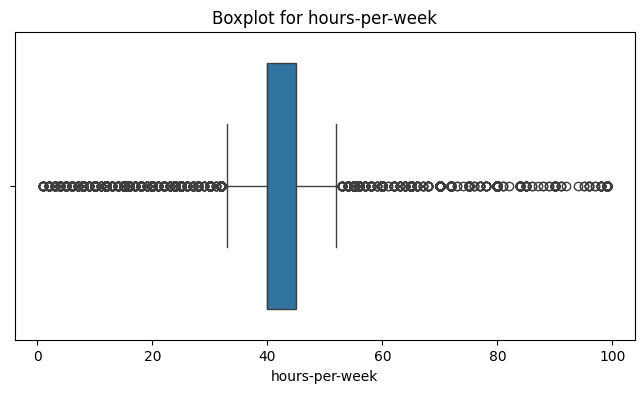

In [6]:
import seaborn as sns

plt.figure(figsize=(8,4))
sns.boxplot(x=data["hours-per-week"])
plt.title("Boxplot for hours-per-week")
plt.show()


Boxplot-ul pentru variabila hours-per-week evidențiază faptul că majoritatea observațiilor sunt concentrate în jurul valorii de 40 de ore pe săptămână.

Se observă existența unor valori extreme atât în partea inferioară, cât și în partea superioară a distribuției, în special pentru valori foarte mari ale numărului de ore lucrate pe săptămână (peste 60–70 de ore), care pot fi considerate outlieri.

Prezența acestor outlieri confirmă distribuția asimetrică observată anterior și sugerează necesitatea tratării acestora în etapa de preprocesare a datelor, în funcție de modelul utilizat.

5. Summary report of EDA findings

Analiza exploratorie a setului de date a evidențiat faptul că variabila țintă hours-per-week este concentrată în jurul valorii de 40 de ore pe săptămână, ceea ce sugerează un program standard de lucru pentru majoritatea indivizilor. Distribuția este ușor asimetrică spre dreapta și prezintă valori extreme, în special pentru un număr foarte mare de ore lucrate, care pot fi considerate outlieri.

Statisticile descriptive confirmă această observație, media și mediana fiind apropiate, dar cu o deviație standard relativ ridicată, indicând o variabilitate semnificativă în rândul observațiilor. De asemenea, variabilele capital-gain și capital-loss prezintă distribuții puternic asimetrice, cu multe valori zero și câteva valori foarte mari, ceea ce indică prezența unor anomalii.

Analiza valorilor lipsă arată că acestea apar doar în anumite variabile categoriale (workclass, occupation și native-country), în timp ce variabilele numerice, inclusiv variabila țintă, nu conțin valori lipsă.

În ansamblu, EDA a scos în evidență existența outlierilor și a distribuțiilor asimetrice, aspecte care justifică etapele de preprocesare aplicate ulterior și care pot necesita o atenție suplimentară în etapa de modelare și selecție a algoritmilor.

6. Histograms for numerical columns

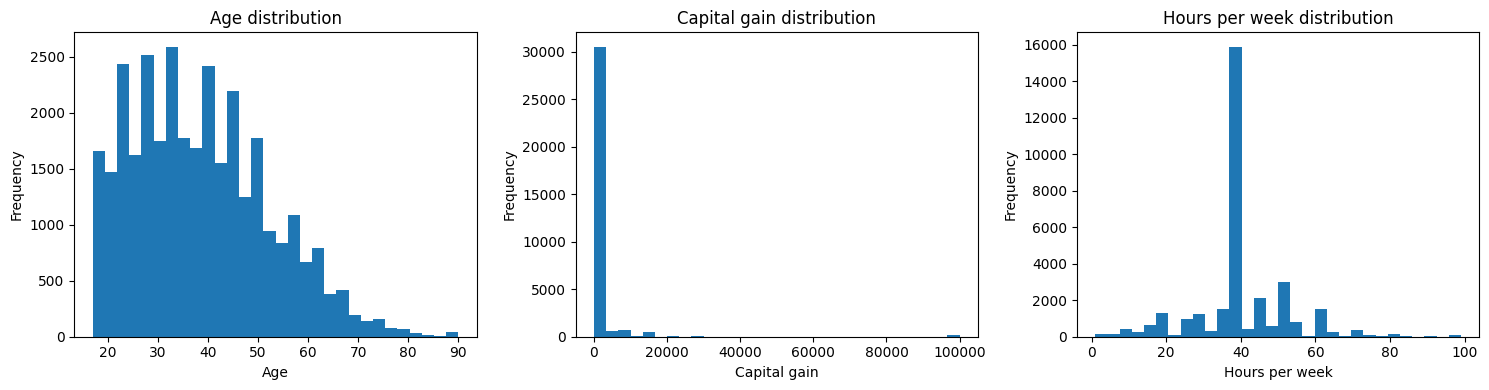

In [7]:
plt.figure(figsize=(15,4))

# Histogram for age
plt.subplot(1,3,1)
plt.hist(data["age"], bins=30)
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Histogram for capital-gain
plt.subplot(1,3,2)
plt.hist(data["capital-gain"], bins=30)
plt.title("Capital gain distribution")
plt.xlabel("Capital gain")
plt.ylabel("Frequency")

# Histogram for hours-per-week
plt.subplot(1,3,3)
plt.hist(data["hours-per-week"], bins=30)
plt.title("Hours per week distribution")
plt.xlabel("Hours per week")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


Distribuția variabilei age este relativ largă, cu o concentrație mai mare a observațiilor în intervalul adulților activi (aproximativ 25–55 de ani). Distribuția este ușor asimetrică, fără o modalitate extrem de pronunțată.

Variabila capital-gain prezintă o distribuție puternic asimetrică spre dreapta, cu majoritatea valorilor concentrate în jurul valorii zero și câteva valori foarte mari. Această distribuție indică existența unor outlieri și o modalitate dominantă la zero.

Distribuția variabilei hours-per-week este clar concentrată în jurul valorii de 40 de ore, sugerând un program standard de lucru. Distribuția este ușor asimetrică spre dreapta și prezintă valori extreme pentru un număr mare de ore lucrate.

Aceste distribuții confirmă necesitatea unor transformări sau tehnici robuste în etapa de modelare, în special pentru variabilele cu asimetrie pronunțată.


7. Bar plots for categorical columns

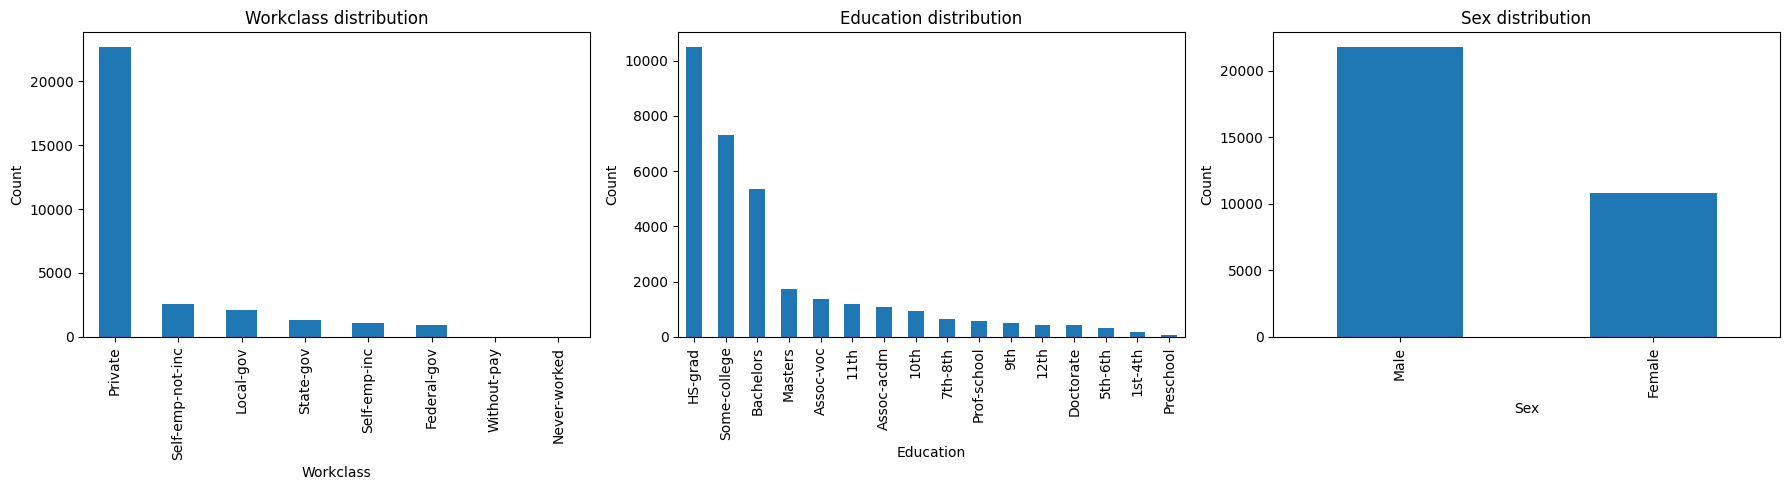

In [8]:
plt.figure(figsize=(18,5))

# Bar plot for workclass
plt.subplot(1,3,1)
data["workclass"].value_counts().plot(kind="bar")
plt.title("Workclass distribution")
plt.xlabel("Workclass")
plt.ylabel("Count")

# Bar plot for education
plt.subplot(1,3,2)
data["education"].value_counts().plot(kind="bar")
plt.title("Education distribution")
plt.xlabel("Education")
plt.ylabel("Count")

# Bar plot for sex
plt.subplot(1,3,3)
data["sex"].value_counts().plot(kind="bar")
plt.title("Sex distribution")
plt.xlabel("Sex")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


Distribuția variabilei workclass arată că majoritatea indivizilor lucrează în sectorul privat, urmat de alte categorii precum self-employed sau sectorul guvernamental.

Variabila education prezintă o diversitate ridicată, cu cele mai frecvente niveluri fiind HS-grad și Bachelors, ceea ce indică un nivel educațional mediu spre ridicat în setul de date.

Distribuția variabilei sex arată o predominanță a indivizilor de sex masculin, evidențiind un dezechilibru de gen în setul de date.

8. Correlation matrix

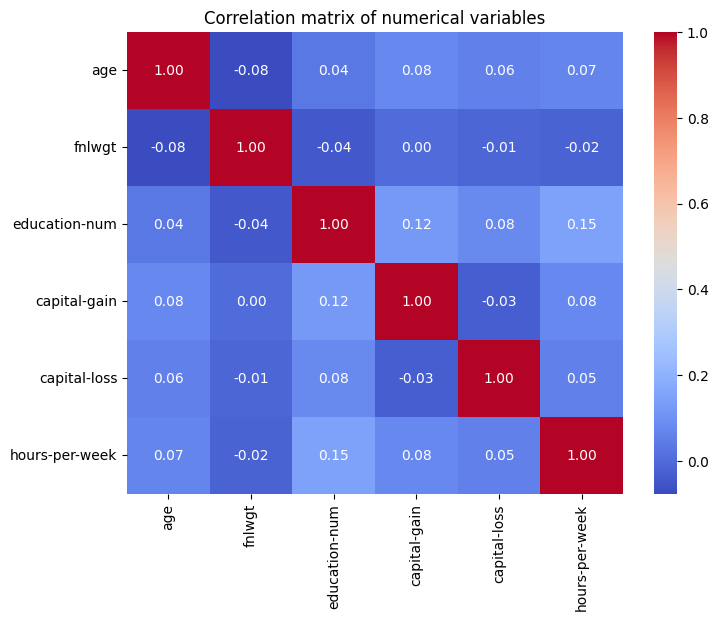

In [9]:
# Select only numerical columns
numeric_cols = data.select_dtypes(include=["int64", "float64"])

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation matrix of numerical variables")
plt.show()



In [10]:
corr_with_target = corr_matrix["hours-per-week"].sort_values(ascending=False)
corr_with_target


hours-per-week    1.000000
education-num     0.148123
capital-gain      0.078409
age               0.068756
capital-loss      0.054256
fnlwgt           -0.018768
Name: hours-per-week, dtype: float64

Matricea de corelație arată că variabila hours-per-week are corelații relativ slabe cu majoritatea variabilelor numerice din setul de date.

Cea mai puternică corelație pozitivă se observă între hours-per-week și capital-gain, sugerând că persoanele care lucrează mai multe ore tind să aibă câștiguri de capital mai mari, deși relația nu este foarte puternică.

Variabila education-num prezintă o corelație pozitivă moderată cu hours-per-week, indicând că un nivel educațional mai ridicat este asociat cu un număr mai mare de ore lucrate.

Corelațiile dintre hours-per-week și variabile precum age sau fnlwgt sunt slabe, sugerând o relație liniară redusă.

În general, rezultatele indică faptul că niciuna dintre variabilele numerice nu explică singură în mod puternic variația numărului de ore lucrate pe săptămână.

9. Scatter plot: numerical variable vs hours-per-week

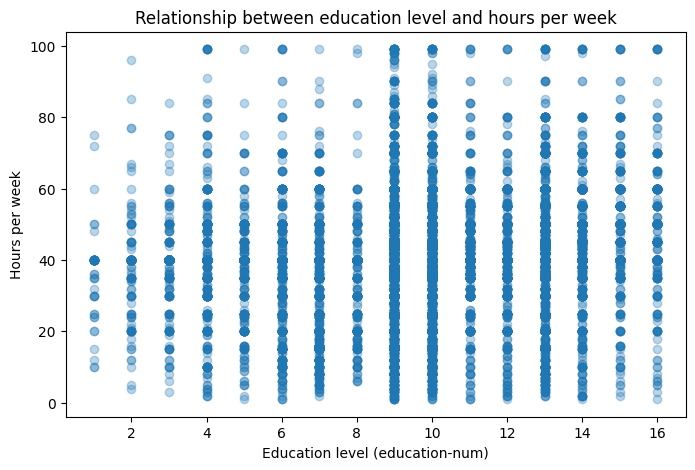

In [11]:
plt.figure(figsize=(8,5))
plt.scatter(data["education-num"], data["hours-per-week"], alpha=0.3)
plt.xlabel("Education level (education-num)")
plt.ylabel("Hours per week")
plt.title("Relationship between education level and hours per week")
plt.show()


Scatter plot-ul ilustrează relația dintre nivelul de educație (education-num) și numărul de ore lucrate pe săptămână (hours-per-week).

Se observă o tendință ușor pozitivă, în sensul că persoanele cu un nivel educațional mai ridicat tind să lucreze, în medie, mai multe ore pe săptămână.

Cu toate acestea, distribuția punctelor este destul de dispersată, indicând o variabilitate ridicată a numărului de ore lucrate pentru fiecare nivel educațional. Acest lucru sugerează că educația nu este singurul factor care influențează durata programului de lucru.

Rezultatele sunt consistente cu analiza matricei de corelație, unde education-num a fost una dintre variabilele numerice cu cea mai mare corelație cu variabila țintă hours-per-week, deși corelația nu este foarte puternică.

10. Relationship between hours-per-week and categorical variables

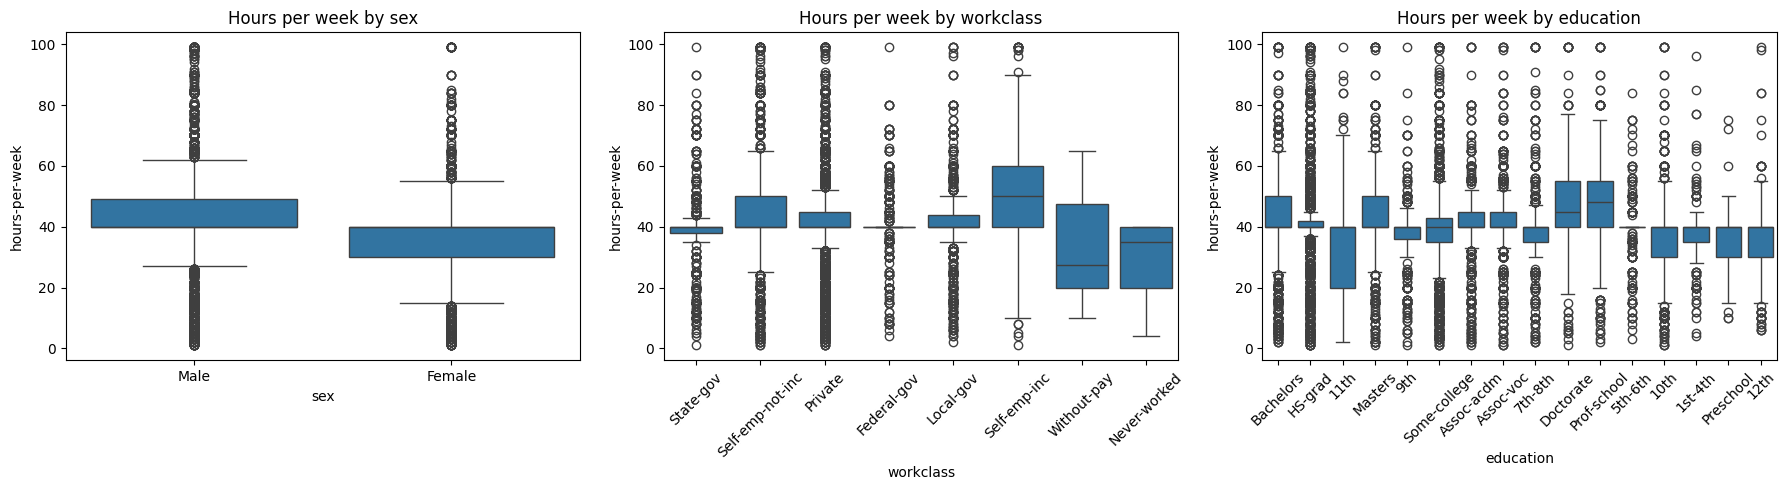

In [12]:
plt.figure(figsize=(18,5))

# Boxplot for sex
plt.subplot(1,3,1)
sns.boxplot(x="sex", y="hours-per-week", data=data)
plt.title("Hours per week by sex")

# Boxplot for workclass
plt.subplot(1,3,2)
sns.boxplot(x="workclass", y="hours-per-week", data=data)
plt.xticks(rotation=45)
plt.title("Hours per week by workclass")

# Boxplot for education
plt.subplot(1,3,3)
sns.boxplot(x="education", y="hours-per-week", data=data)
plt.xticks(rotation=45)
plt.title("Hours per week by education")

plt.tight_layout()
plt.show()


Boxplot-urile evidențiază relația dintre variabila țintă hours-per-week și mai multe variabile categorice.

În cazul variabilei sex, se observă că bărbații tind să lucreze, în medie, mai multe ore pe săptămână decât femeile, iar distribuția orelor este mai dispersată.

Pentru workclass, există diferențe vizibile între categorii, anumite tipuri de ocupații (de exemplu, self-employed sau private) fiind asociate cu un număr mai mare de ore lucrate și cu o variabilitate mai ridicată.

În ceea ce privește education, nivelurile educaționale mai ridicate tind să fie asociate cu un număr ușor mai mare de ore lucrate pe săptămână, deși există suprapuneri semnificative între categorii.

Aceste observații sugerează că variabilele categorice influențează durata programului de lucru, însă relația nu este uniformă și este probabil afectată și de alți factori socio-economici.

11. Same EDA for the preprocessed dataset

Încărcăm datasetul preprocesat

In [13]:
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")

data_preprocessed = pd.concat([X_train, y_train], axis=1)
data_preprocessed.head()


,age,fnlwgt,education-num,capital-gain,capital-loss,has_capital,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K,hours-per-week
0,-0.188855,-0.622940,-0.457496,0.0,0.0,0.0,-0.174361,-0.262201,-0.014669,0.659587,...,-0.019208,-0.049647,-0.039622,-0.023527,-0.024172,0.340701,-0.045425,-0.022181,-0.563377,38.0
1,0.991553,-0.763241,-0.457496,0.0,0.0,0.0,-0.174361,-0.262201,-0.014669,0.659587,...,-0.019208,-0.049647,-0.039622,-0.023527,-0.024172,0.340701,-0.045425,-0.022181,-0.563377,40.0
2,-0.336405,0.241630,-0.050893,0.0,0.0,0.0,-0.174361,-0.262201,-0.014669,0.659587,...,-0.019208,-0.049647,-0.039622,-0.023527,-0.024172,0.340701,-0.045425,-0.022181,1.775009,40.0
3,1.139104,-0.037606,-0.457496,0.0,0.0,0.0,-0.174361,-0.262201,-0.014669,0.659587,...,-0.019208,-0.049647,-0.039622,-0.023527,-0.024172,0.340701,-0.045425,-0.022181,-0.563377,40.0
4,-0.631507,-1.088894,-0.457496,0.0,0.0,0.0,-0.174361,-0.262201,-0.014669,0.659587,...,-0.019208,-0.049647,-0.039622,-0.023527,-0.024172,0.340701,-0.045425,-0.022181,-0.563377,55.0


histogramă

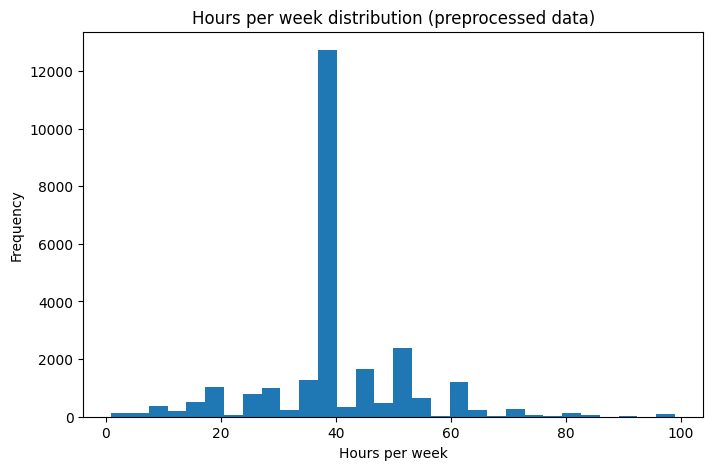

In [14]:
plt.figure(figsize=(8,5))
plt.hist(data_preprocessed["hours-per-week"], bins=30)
plt.title("Hours per week distribution (preprocessed data)")
plt.xlabel("Hours per week")
plt.ylabel("Frequency")
plt.show()



### Distribuția variabilei hours-per-week (dataset preprocesat)

Distribuția variabilei *hours-per-week* în setul de date preprocesat este puternic concentrată în jurul valorii de **40 de ore**, corespunzătoare unui program standard de muncă.

Distribuția este ușor **asimetrică spre dreapta**, cu un număr redus de observații care indică un volum foarte mare de ore lucrate pe săptămână (outlieri). Forma distribuției este similară cu cea observată în datasetul inițial, ceea ce confirmă faptul că preprocesarea nu a distorsionat structura datelor.

Această stabilitate a distribuției sugerează că setul de date este adecvat pentru utilizarea în etapele ulterioare de modelare.


Statistici descriptive

In [15]:
data_preprocessed["hours-per-week"].describe()


count    26029.000000
mean        40.393868
std         12.341250
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

### Statistici descriptive – hours-per-week (dataset preprocesat)

Variabila *hours-per-week* are o valoare medie de aproximativ **40.4 ore pe săptămână**, iar mediana este **40 de ore**, ceea ce indică faptul că majoritatea persoanelor lucrează un program standard de lucru.

Abaterea standard este de aproximativ **12.3 ore**, sugerând o variabilitate moderată în numărul de ore lucrate. Valorile minime și maxime sunt **1** și **99 de ore**, indicând existența unor valori extreme.

Comparativ cu datasetul inițial, statisticile descriptive sunt foarte similare, ceea ce arată că procesul de preprocesare (tratarea valorilor lipsă și standardizarea) nu a modificat semnificativ distribuția variabilei țintă.


## Exploratory Data Analysis – Preprocessed Dataset

Această secțiune prezintă o analiză exploratorie a setului de date preprocesat, obținut în urma etapelor de curățare și transformare aplicate în Task 1. Scopul este de a verifica dacă preprocesarea a afectat distribuțiile variabilelor și dacă datele sunt adecvate pentru etapa de modelare.

### Distribuția variabilei țintă (hours-per-week)

Distribuția variabilei *hours-per-week* în setul de date preprocesat este foarte similară cu cea observată în datasetul inițial. Valorile sunt puternic concentrate în jurul valorii de **40 de ore pe săptămână**, indicând un program standard de muncă pentru majoritatea observațiilor.

Distribuția rămâne ușor asimetrică spre dreapta, cu un număr redus de valori extreme (outlieri), corespunzătoare persoanelor care lucrează un număr foarte mare de ore pe săptămână.

### Statistici descriptive

Statisticile descriptive confirmă stabilitatea variabilei țintă după preprocesare. Media și mediana sunt apropiate (aproximativ **40 de ore**), iar abaterea standard indică o variabilitate moderată a numărului de ore lucrate.

Intervalul de variație al variabilei (1–99 ore) rămâne neschimbat, ceea ce arată că preprocesarea nu a eliminat observații relevante și nu a distorsionat informația inițială.

### Comparație cu datasetul inițial

Comparativ cu setul de date inițial, preprocesarea a avut ca efect principal:
- eliminarea valorilor lipsă;
- standardizarea formatului variabilelor;
- pregătirea datelor pentru modelare.

Forma distribuțiilor și relațiile dintre variabile au rămas în mare parte neschimbate, ceea ce indică faptul că procesul de preprocesare a fost corect aplicat.

### Concluzie

Analiza exploratorie a setului de date preprocesat arată că datele sunt curate, coerente și potrivite pentru etapa de modelare. Preprocesarea nu a introdus distorsiuni semnificative și a păstrat structura statistică a datasetului inițial.
